# PyTorch框架学习目标：
- 知道什么是PyTorch框架，相比于TensorFlow有哪些异同点
- PyTorch框架有哪些特点
- PyTorch发展史有哪些重要节点
- 学习张量，知道其基本创建方式、特点，以及基本运算、索引、转换方法
- 学习自动微分和梯度基本计算
- 使用PyTorch构建基本线性模型


# 1、什么是pyTorch框架？
概念：PyTorch是基于Python的科学计算包
```bash
pip install torch -i https://pypi.tuna.tsinghua.edu.cn/simple
```

# 2、PyTorch有哪些特点？
- 类似于NumPy的张量计算：PyTorch中基本结构是张量（Tensor），它与NumPy中数组类似，但是PyTorch张量具有CPU加速的能力（通过CUDA），这使得深度学习模型能够高效的在GPU中运行
- 自动微分系统：
    - PyTorch提供了强大的自动微分功能（AutoGrad模块），能够自动计算模型中每个参数梯度，
    - 自动唯粉使得梯度计算过程变得简洁高效，并且支持复杂的模型和动态计算图
- 深度学习库：
    - PyTorch提供了一个名为torch.nn的子模块，用于构建神经网络，它包括了大量的预构建曾层（如全联接层、卷积层、循环神经网络层），损失函数（如交叉熵、均方误差），以及优化算法（SGD、Adam等）
    - torch.nn.module是PyTorch中构建神经网络的基础类，用户可以通过继承该类来定义自己的神经网络架构
- 动态图计算：
    - PyTorch使用动态计算机制，允许在运行时构建和修改模型结构，具有更高的灵活性，适合于研究人员进行实验和模型调试
- GPU加速（CUDA支持：CUDA是NVIDIA开发的一种并行计算平台和编程模型，允许利用GPU加速计算密集型任务）：
    - PyTorch提供对GPU的良好支持，可以轻松的将模型和数据从CPU转移到GPU或从一个GPU转移到GPU上，PyTorch回自动优化计算过程
- 跨平台支持：
    - PyTorch支持在多种硬件平台（如：CPU、GPU、TPU）上运行，并且支持不同的操作系统（Linux、Windows、MacOS）以及分布式计算环境（多GPU、分布式训练）

# 3、PyTorch发展历史

![PyTorch发展史](./file/PyTorch发展史.png)

- Torch最早的是Torch框架，由Ronan·Collobert和Clement·Farabet等人开发，是一个科学计算框架，提供了多维张量操作可算计算工具
- Torch7是Torch的一个后续版本，引入了Lua编程语言，随着pytorch的普及，Torch便不再维护，Torch7也就成为了Torch的最后一个版本。
- Pytorch 0.1.0：是Facebook人工智能研究院（FAIR）于2016年发布了PyTorch的第一个版本，标志着PyTorch的正式诞生。
- Pytorch 0.2.0：该版本首次引入了动态图机制，使得用户能够在构建神经网络时更加灵活。作为Pytorch后期制胜tensorflow的关键机制，该版本象征着Pytorch进入了一个新的阶段。
- Pytorch 1.0.0：2018年发布了Pytorch的首个稳定版本，引入了Eager模式简化了模型的构建和训练过程。
- Pytorch 2.0：Pytorch2.0引入了torch.compile，可以支持对训练过程的加速，同时引入了TorchDynamo，主要替换torch.jit.trace和torch.jit.script。另外在这个版本中编译器性能大幅提升，分布式运行方面也做了一定的优化。

# 什么是张量？
定义：张量（Tensor）是一种数学对象，也是在物理学和工程学中广泛使用的概念。它是一种多维数组，可以表示为一个n维数组，其中n是张量的阶数。张量在不同的领域有不同的应用和解释。





In [3]:
!pip install torch -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [1]:
import torch  # 需要安装torch模块
import numpy as np

# torch.tensor(data=, dtype=) 根据指定数据创建张量
# 1.创建张量标量（data=, dtype=）
data = torch.tensor(10)
print(data)

# 2.numpy数组，犹豫data为float64，张量元素类型也是float64
data = np.random.randn(2, 3)
data = torch.tensor(data)
print(data)

# 3.列表、浮点数默认都是flaot32
data = [[10, 20, 30], [40, 50, 60]]
data = torch.tensor(data)
print(data)

tensor(10)
tensor([[ 0.5980, -0.0095, -0.5941],
        [-1.0971, -0.5787, -0.6149]], dtype=torch.float64)
tensor([[10, 20, 30],
        [40, 50, 60]])


In [5]:
# torch.Tensor(size=) 根据形状来创建张量
# 1、创建一个2行3列的张量，默认dtype为float32
data = torch.Tensor(2, 3)
print(data)

# 2、如果传递列表代表，则包含创建包含指定元素的张量
data = torch.Tensor([10])
print(data)

data = torch.Tensor([10, 20])
print(data)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([10.])
tensor([10., 20.])


In [6]:
# torch.IntTensor()/torch.FloatTensor() 创建指定类型的张量

# 1、创建2行3列，dtype为int32的张量
data = torch.IntTensor(2, 3)
print(f'2行3列，dtype为int32的张量：{data}')

# 2、如果传入的元素类型不正确，则回进行类型转换
#data = torch.IntTensor([2.5, 3.3])
#print(f'类型转换张量：{data}')

# 3、其他类型
data = torch.ShortTensor()  # int16
print(f'int16类型张量：{data}')

data = torch.LongTensor()  # int64
print(f'int64类型张量：{data}')

data = torch.FloatTensor()  # float32
print(f'float32类型张量：{data}')

data = torch.DoubleTensor()  # float64
print(f'float64类型张量：{data}')

2行3列，dtype为int32的张量：tensor([[0, 0, 0],
        [0, 0, 0]], dtype=torch.int32)
int16类型张量：tensor([], dtype=torch.int16)
int64类型张量：tensor([], dtype=torch.int64)
float32类型张量：tensor([])
float64类型张量：tensor([], dtype=torch.float64)


In [7]:
# 线性和随机张量

# torch.arange(start=, end=, step=)：固定步长线性张量
# 1、在指定区间按照补偿生成元素[start, end, steps]左闭右开
data = torch.arange(0, 10, 2)
print(data)

# 2、在指定区间啊找元素个数生成[start, end, steps]左闭右闭
# step = (end - start) /( step - 1)
# value_i = start + step * i
data = torch.linspace(0, 9, 10)
print(data)

tensor([0, 2, 4, 6, 8])
tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])


In [8]:
# torch.randn/rand(size=) 创建随机浮点数类型张量
# torch.randint(low=, high=, size=) 创建随机整数类型张量 左闭右开
# torch.initial_seed() 和 torch.manual_seed(seed=) 随机种子设置

# 1、创建随机张量
data = torch.randn(2, 3)
print(data)
print(f'查看随机数种子：{torch.initial_seed()}')

# 2、随机数种子设置
torch.manual_seed(100)
data = torch.randn(2, 3)
print(data)
print(f'随机数种子：{torch.initial_seed()}')



tensor([[ 0.4337, -2.1093, -1.0010],
        [ 0.4639, -1.2823, -1.4343]])
查看随机数种子：4910714865061174651
tensor([[ 0.3607, -0.2859, -0.3938],
        [ 0.2429, -1.3833, -2.3134]])
随机数种子：100


In [9]:
# 指定值张量

# torch.zeros(size=) 和 torch.zeros_like(input=) 创建全0张量
# 1、创建指定形状全0张量
data = torch.zeros(2, 3)
print(f'创建指定形状全零张量:{data}')

# 2、根据张量形状创建全0张量
data = torch.zeros_like(data)
print(f'根据传入张量形状创建全零张量：{data}')

# torch.ones(size=) 和 torch.ones_like(input=) 创建全1张量
# 3、创建指定形状全1张量
data = torch.ones(2, 3)
print(f'指定形状全一张量：{data}')

data = torch.ones_like(data)
print(f'根据输入张量形状创建全一张量：{data}')

# torch.full(size=, fill_value=) 和 torch.full_like(input=, fill_value=) 创建全为指定值张量
# 4、 创建指定形状指定值的张量
data = torch.full([2, 3], 10)
print(f'全为指定值张量:{data}')

# 5、根据张量形状创建指定值的张量
data = torch.full_like(data, 20)
print(f'根据张量形状创建指定值的张量:{data}')


创建指定形状全零张量:tensor([[0., 0., 0.],
        [0., 0., 0.]])
根据传入张量形状创建全零张量：tensor([[0., 0., 0.],
        [0., 0., 0.]])
指定形状全一张量：tensor([[1., 1., 1.],
        [1., 1., 1.]])
根据输入张量形状创建全一张量：tensor([[1., 1., 1.],
        [1., 1., 1.]])
全为指定值张量:tensor([[10, 10, 10],
        [10, 10, 10]])
根据张量形状创建指定值的张量:tensor([[20, 20, 20],
        [20, 20, 20]])


In [10]:
# 指定元素类型张量
# data.type(dtype=)
data = torch.full([2, 3], 10)
print(data.dtype)

# 将 data 元素类型转换为 float64 类型
data = data.type(torch.DoubleTensor)
print(data.dtype)

# 转换为其他类型
data = data.type(torch.ShortTensor)
data = data.type(torch.IntTensor)
data = data.type(torch.LongTensor)
data = data.type(torch.FloatTensor)
data = data.type(dtype=torch.float16)

# data.half/float/double/short/int/long()
data = torch.full([2, 3], 10)
print(data.dtype)
# 将 data 元素类型转换为 float64 类型
data = data.double()
print(data.dtype)
# 转换为其他类型
# data = data.short()
# data = data.int()
# data = data.long()
# data = data.float()


torch.int64
torch.float64
torch.int64
torch.float64


In [11]:
# 张量类型转换

# 使用 t.numpy() 函数可以将张量转换为 ndarray 数组，但是共享内存，可以使用copy函数避免共享。

# 1、张量转换为NumPy数组
data_tensor = torch.tensor([2, 3, 4])
# 使用张量对象中的 numpy 函数进行转换
data_numpy = data_tensor.numpy()
print(type(data_tensor))
print(type(data_numpy))
# 注意: data_tensor 和 data_numpy 共享内存
# 修改其中的一个，另外一个也会发生改变
# data_tensor[0] = 100
data_numpy[0] = 100
print(data_tensor)
print(data_numpy)

# 2. 对象拷贝避免共享内存
data_tensor = torch.tensor([2, 3, 4])
# 使用张量对象中的 numpy 函数进行转换，通过copy方法拷贝对象
data_numpy = data_tensor.numpy().copy()
print(type(data_tensor))
print(type(data_numpy))
# 注意: data_tensor 和 data_numpy 此时不共享内存
# 修改其中的一个，另外一个不会发生改变
# data_tensor[0] = 100
data_numpy[0] = 100
print(data_tensor)
print(data_numpy)


RuntimeError: Numpy is not available

In [12]:
# 当张量只包含一个元素时, 可以通过 item() 函数提取出该值
data = torch.tensor([30, ])
print(data.item())
data = torch.tensor(30)
print(data.item())

30
30


In [13]:
data = torch.randint(0, 10, [2, 3])
print(f'初始化张量:{data}')

# 1. 不修改原数据
new_data = data.add(10)  # 等价 new_data = data + 10
print(f'张量+10:{data}')

# 2. 直接修改原数据 注意: 带下划线的函数为修改原数据本身
data.add_(10)
print(f'张量再+10:{data}')

# 3. 其他函数
print(f'张量减100:{data.sub(100)}')
print(f'张量乘100:{data.mul(100)}')
print(f'张量除100:{data.div(100)}')
print(f'张量除100:{data.neg()}')

初始化张量:tensor([[8, 8, 4],
        [4, 1, 0]])
张量+10:tensor([[8, 8, 4],
        [4, 1, 0]])
张量再+10:tensor([[18, 18, 14],
        [14, 11, 10]])
张量减100:tensor([[-82, -82, -86],
        [-86, -89, -90]])
张量乘100:tensor([[1800, 1800, 1400],
        [1400, 1100, 1000]])
张量除100:tensor([[0.1800, 0.1800, 0.1400],
        [0.1400, 0.1100, 0.1000]])
张量除100:tensor([[-18, -18, -14],
        [-14, -11, -10]])


In [14]:
# 点乘运算
data1 = torch.tensor([[1, 2], [3, 4]])
data2 = torch.tensor([[5, 6], [7, 8]])
# 第一种方式
data = torch.mul(data1, data2)
print(data)
# 第二种方式
data = data1 * data2
print(data)

tensor([[ 5, 12],
        [21, 32]])
tensor([[ 5, 12],
        [21, 32]])


In [15]:
# 矩阵乘法运算
# 点积运算
data1 = torch.tensor([[1, 2], [3, 4], [5, 6]])
data2 = torch.tensor([[5, 6], [7, 8]])
# 方式一:
data3 = data1 @ data2
print("data3-->", data3)
# 方式二:
data4 = torch.matmul(data1, data2)
print("data4-->", data4)

data3--> tensor([[19, 22],
        [43, 50],
        [67, 78]])
data4--> tensor([[19, 22],
        [43, 50],
        [67, 78]])


In [103]:
'''
张量运算函数
tensor.mean(dim=):平均值
tensor.sum(dim=):求和
tensor.min/max(dim=):最小值/最大值
tensor.pow(exponent=):幂次方 $$x^n$$
tensor.sqrt(dim=):平方根
tensor.exp():指数 $$e^x$$
tensor.log(dim=):对数 以e为底
dim=0按列计算,dim=1按行计算
'''

import torch


def fundamental_operation():
    data = torch.randint(0, 10, [2, 3], dtype=torch.float64)
    print(data)
    # 1. 计算均值
    # 注意: tensor 必须为 Float 或者 Double 类型
    print(data.mean())
    print(data.mean(dim=0))  # 按列计算均值
    print(data.mean(dim=1))  # 按行计算均值
    # 2. 计算总和
    print(data.sum())
    print(data.sum(dim=0))
    print(data.sum(dim=1))
    # 3. 计算平方
    print(torch.pow(data, 2))
    # 4. 计算平方根
    print(data.sqrt())
    # 5. 指数计算, e^n 次方
    print(data.exp())
    # 6. 对数计算
    print(data.log())  # 以 e 为底
    print(data.log2())
    print(data.log10())


fundamental_operation()

tensor([[7., 4., 8.],
        [4., 4., 7.]], dtype=torch.float64)
tensor(5.6667, dtype=torch.float64)
tensor([5.5000, 4.0000, 7.5000], dtype=torch.float64)
tensor([6.3333, 5.0000], dtype=torch.float64)
tensor(34., dtype=torch.float64)
tensor([11.,  8., 15.], dtype=torch.float64)
tensor([19., 15.], dtype=torch.float64)
tensor([[49., 16., 64.],
        [16., 16., 49.]], dtype=torch.float64)
tensor([[2.6458, 2.0000, 2.8284],
        [2.0000, 2.0000, 2.6458]], dtype=torch.float64)
tensor([[1096.6332,   54.5982, 2980.9580],
        [  54.5982,   54.5982, 1096.6332]], dtype=torch.float64)
tensor([[1.9459, 1.3863, 2.0794],
        [1.3863, 1.3863, 1.9459]], dtype=torch.float64)
tensor([[2.8074, 2.0000, 3.0000],
        [2.0000, 2.0000, 2.8074]], dtype=torch.float64)
tensor([[0.8451, 0.6021, 0.9031],
        [0.6021, 0.6021, 0.8451]], dtype=torch.float64)


In [100]:

'''
张量索引操作
我们在操作张量时，经常需要去获取某些元素就进行处理或者修改操作，在这里我们需要了解在torch中的索引操作。
'''

import torch


def tensor_index():
    # 随机生成数据 data[开始行(可省略默认：0): 行步长(可省略默认：1): 结束行(可省略默认：shape), 开始列(可省略默认：0): 列步长(可省略默认：1): 结束列(可省略默认：shape)]
    data = torch.randint(0, 10, [4, 5])
    print(f'随机生成张量：{data}')

    # 1、简单行列索引
    print(f'行索引：{data[0]}')
    print(f'列索引：{data[:, 0]}')

    # 2、列表索引
    print(f'返回(0, 1)和(1, 2)对应位置数据：{data[[0, 1], [1, 2]]}')
    print(f'返回0、1行的1、2列共4个元素：{data[:2, 1:3]}')
    print(f'返回0、1行的1、2列共4个元素：{data[[[0], [1]], [1, 2]]}')

    # 3、范围索引
    print(f'前三行前两列数据：{data[:3, :2]}')
    print(f'第二行到最后的前两列数据：{data[2:, :2]}')

    # 4、布尔索引
    print(f'第三列大于5的行数据:{data[:, :3][data[:, :3] > 5]}')
    print(f'第二行大于5的数据：{data[:, [1]][data[:, [1]] > 5]}')
    print(f'第二行大于5的数据：{data[:, 1:2][data[:, 1:2] > 5]}')

    # 5、多维索引
    data = torch.randint(0, 10, [3, 4, 5])
    print(f'随机生成三维数据：{data}')
    print(f'获取0轴上第一个数据：{data[0, :, :]}')
    print(f'获取0轴上第一个数据：{data[[0]]}')

    print(f'获取0轴上第一个数据：{data[[1]]}')
    print(f'获取1轴上第一个数据：{data[:, 0, :]}')
    print(f'获取2轴上第一个数据：{data[:, :, 0]}')


tensor_index()

随机生成张量：tensor([[6, 6, 4, 5, 2],
        [2, 4, 0, 9, 6],
        [5, 8, 2, 8, 2],
        [3, 1, 5, 9, 1]])
行索引：tensor([6, 6, 4, 5, 2])
列索引：tensor([6, 2, 5, 3])
返回(0, 1)和(1, 2)对应位置数据：tensor([6, 0])
返回0、1行的1、2列共4个元素：tensor([[6, 4],
        [4, 0]])
返回0、1行的1、2列共4个元素：tensor([[6, 4],
        [4, 0]])
前三行前两列数据：tensor([[6, 6],
        [2, 4],
        [5, 8]])
第二行到最后的前两列数据：tensor([[5, 8],
        [3, 1]])
第三列大于5的行数据:tensor([6, 6, 8])
第二行大于5的数据：tensor([6, 8])
第二行大于5的数据：tensor([6, 8])
随机生成三维数据：tensor([[[7, 0, 9, 8, 0],
         [7, 9, 7, 9, 7],
         [2, 0, 4, 0, 7],
         [0, 9, 6, 0, 0]],

        [[1, 1, 2, 5, 3],
         [7, 1, 3, 1, 5],
         [9, 2, 2, 1, 5],
         [3, 8, 7, 4, 3]],

        [[0, 9, 4, 7, 9],
         [6, 4, 6, 3, 2],
         [1, 4, 1, 4, 4],
         [3, 7, 4, 8, 2]]])
获取0轴上第一个数据：tensor([[7, 0, 9, 8, 0],
        [7, 9, 7, 9, 7],
        [2, 0, 4, 0, 7],
        [0, 9, 6, 0, 0]])
获取0轴上第一个数据：tensor([[[7, 0, 9, 8, 0],
         [7, 9, 7, 9, 7],
         [2, 0, 4

In [104]:
import torch


def reshape():
    # 张量形状操作
    data = torch.tensor([[10, 20, 30], [40, 50, 60]])
    # 1. 使用 shape 属性或者 size 方法都可以获得张量的形状
    print(data.shape, data.shape[0], data.shape[1])
    print(data.size(), data.size(0), data.size(1))

    # 2. 使用 reshape 函数修改张量形状
    new_data = data.reshape(1, 6)
    print(new_data.shape)

    data = torch.randint(0, 10, [3, 4, 5, 6, 7])
    print(f'张量：{data}')
    print(f'张量形状：{data.shape}')
    print(f'张量形状：{data.shape[0]}')
    print(f'张量形状：{data.shape[1]}')
    print(f'张量形状：{data.shape[2]}')
    print(f'张量形状：{data.shape[3]}')

    print(f'张量形状：{data.size(0)}')
    print(f'张量形状：{data.size(1)}')
    print(f'张量形状：{data.size(2)}')
    print(f'张量形状：{data.size(3)}')

    # 2. 使用 reshape 函数修改张量形状
    reshape_data = data.reshape([3, 2, 5, 6, 14])
    print(f'张量修改形状(总数不变)：{reshape_data}')
    print(reshape_data.shape)

    data = torch.tensor([[10, 20, 30], [40, 50, 60]])
    # 1. 使用 shape 属性或者 size 方法都可以获得张量的形状
    print(data.shape, data.shape[0], data.shape[1])
    print(data.size(), data.size(0), data.size(1))

    # 2. 使用 reshape 函数修改张量形状
    new_data = data.reshape(1, 6)
    print(new_data.shape)


reshape()

torch.Size([2, 3]) 2 3
torch.Size([2, 3]) 2 3
torch.Size([1, 6])
张量：tensor([[[[[9, 7, 4,  ..., 3, 2, 4],
           [6, 1, 0,  ..., 7, 7, 9],
           [1, 7, 1,  ..., 9, 4, 9],
           [0, 8, 5,  ..., 6, 2, 5],
           [3, 4, 6,  ..., 8, 4, 7],
           [1, 3, 8,  ..., 1, 3, 4]],

          [[5, 5, 3,  ..., 9, 7, 3],
           [1, 7, 7,  ..., 3, 6, 1],
           [3, 0, 5,  ..., 7, 9, 6],
           [3, 7, 1,  ..., 6, 3, 0],
           [6, 1, 8,  ..., 8, 1, 6],
           [5, 0, 8,  ..., 6, 9, 7]],

          [[7, 1, 9,  ..., 7, 4, 9],
           [2, 1, 9,  ..., 9, 4, 3],
           [6, 5, 9,  ..., 7, 6, 0],
           [1, 1, 1,  ..., 4, 6, 2],
           [9, 9, 6,  ..., 9, 4, 1],
           [2, 4, 7,  ..., 4, 9, 2]],

          [[3, 6, 4,  ..., 6, 2, 8],
           [9, 8, 1,  ..., 2, 4, 4],
           [3, 0, 1,  ..., 6, 5, 5],
           [9, 7, 3,  ..., 2, 8, 6],
           [5, 0, 4,  ..., 5, 0, 0],
           [1, 7, 2,  ..., 5, 0, 5]],

          [[0, 6, 3,  ..., 4, 2, 4],

In [97]:
'''
张量squeeze和unsqueeze
- squeeze:删除指定位置形状为1的维度，不指定位置删除所有形状为1的维度（降维）
- unsqueeze:在指定位置添加形状为1的维度（升维）
'''


def squeeze_or_unsqueeze():
    squeeze_data = torch.tensor([1, 2, 3, 4, 5])
    print(f'squeeze和unsqueeze案例 维度：{squeeze_data.shape}， 数据集:{squeeze_data}')

    squeeze_data = squeeze_data.unsqueeze(dim=0)
    print(f'在位置为0的位置添加形状为1的维度 维度：{squeeze_data.shape}， 数据集:{squeeze_data}')

    squeeze_data = squeeze_data.unsqueeze(dim=1)
    print(f'在1维上拓展维度 维度：{squeeze_data.shape}， 数据集:{squeeze_data}')

    squeeze_data = squeeze_data.unsqueeze(dim=-1)
    print(f'在-1维基础上拓展维度 维度：{squeeze_data.shape}， 数据集:{squeeze_data}')


squeeze_or_unsqueeze()

squeeze和unsqueeze案例 维度：torch.Size([5])， 数据集:tensor([1, 2, 3, 4, 5])
在位置为0的位置添加形状为1的维度 维度：torch.Size([1, 5])， 数据集:tensor([[1, 2, 3, 4, 5]])
在1维上拓展维度 维度：torch.Size([1, 1, 5])， 数据集:tensor([[[1, 2, 3, 4, 5]]])
在-1维基础上拓展维度 维度：torch.Size([1, 1, 5, 1])， 数据集:tensor([[[[1],
          [2],
          [3],
          [4],
          [5]]]])


In [96]:
'''
transpose和permute
transpose：实现交换正浪形状的指定维度，；例如一个形状为（2，3，4）把3和4进行交换，将张量变换为（2，4，3）
permute：一次性交换更多的维度
'''


def transpose_or_permute():
    # 创建一个三维的张量
    # data = torch.tensor(np.random.randint(0, 10, [3, 4, 5]))
    data = torch.randint(0, 10, [3, 4, 5])
    print(f'data 维度：{data.shape}， 数据集:{data}')

    exchange_transpose = torch.transpose(data, 1, 2)
    print(f'交换1和2维度 形状：{exchange_transpose.shape}, 数据：{exchange_transpose}')

    first_transpose = torch.transpose(data, 0, 1)
    second_transpose = torch.transpose(first_transpose, 1, 2)
    print(f'将形状修改为（4， 5， 3）形状：{second_transpose.shape}， 数据：{second_transpose}')

    permute_data = torch.permute(data, [1, 2, 0])
    print(f'使用permute函数将形状修改为（4， 5， 3）形状：{permute_data.shape}, 数据 ：{permute_data}')


transpose_or_permute()

data 维度：torch.Size([3, 4, 5])， 数据集:tensor([[[6, 6, 8, 3, 9],
         [4, 9, 0, 1, 5],
         [4, 3, 3, 8, 6],
         [0, 1, 3, 4, 4]],

        [[8, 3, 6, 9, 4],
         [1, 2, 3, 2, 0],
         [3, 0, 7, 0, 9],
         [6, 7, 1, 4, 4]],

        [[7, 0, 1, 2, 7],
         [6, 4, 5, 5, 2],
         [2, 2, 0, 1, 3],
         [4, 7, 4, 0, 5]]])
交换1和2维度 形状：torch.Size([3, 5, 4]), 数据：tensor([[[6, 4, 4, 0],
         [6, 9, 3, 1],
         [8, 0, 3, 3],
         [3, 1, 8, 4],
         [9, 5, 6, 4]],

        [[8, 1, 3, 6],
         [3, 2, 0, 7],
         [6, 3, 7, 1],
         [9, 2, 0, 4],
         [4, 0, 9, 4]],

        [[7, 6, 2, 4],
         [0, 4, 2, 7],
         [1, 5, 0, 4],
         [2, 5, 1, 0],
         [7, 2, 3, 5]]])
将形状修改为（4， 5， 3）形状：torch.Size([4, 5, 3])， 数据：tensor([[[6, 8, 7],
         [6, 3, 0],
         [8, 6, 1],
         [3, 9, 2],
         [9, 4, 7]],

        [[4, 1, 6],
         [9, 2, 4],
         [0, 3, 5],
         [1, 2, 5],
         [5, 0, 2]],

        [[4

In [88]:
'''
view和contiguous函数
view：也可以用于修改张量形状，但只能用于连续张量，在PyTorch中有些张量的底层数据在内存中存储顺序与其在张量逻辑顺序不一致，view函数无反对这样的张量进行变形处理，eg：一个张量经过transpose或者permute函数的处理后，就无法使用view函数进行形状操作
contiguous：将不连续张量转化为连续张量
is_contiguous：判断张量是否连续，并返回True/False
'''


def view_or_contiguous_demo():
    data = torch.tensor([[10, 20, 30], [40, 50, 60]])
    print(f'shape：{data.shape}, data :{data}')

    is_contiguous = data.is_contiguous()
    print(f'张量是否连续：{is_contiguous}')

    data = data.view(3, 2)
    print(f'使用transpose改变张量形状 shape：{data.shape}, is_contiguous: {data.is_contiguous()} data:{data}')

    data = torch.transpose(data, 0, 1)
    print(f'使用transpose改变张量形状 shape：{data.shape}, is_contiguous: {data.is_contiguous()} data:{data}')

    # 这里再使用view就会报错，因为当前张量不连续
    #data = data.view(3, 2)
    #print(f'使用view改变张量形状 shape：{data.shape}, is_contiguous: {data.is_contiguous()} data:{data}')

    data = data.contiguous()
    print(f'使用contiguous改为连续张量 shape：{data.shape}, is_contiguous: {data.is_contiguous()} data:{data}')

    data = data.view(2, 3)
    print(f'使用view改变张量形状 shape：{data.shape}, is_contiguous: {data.is_contiguous()} data:{data}')


view_or_contiguous_demo()

shape：torch.Size([2, 3]), data :tensor([[10, 20, 30],
        [40, 50, 60]])
张量是否连续：True
使用transpose改变张量形状 shape：torch.Size([3, 2]), is_contiguous: True data:tensor([[10, 20],
        [30, 40],
        [50, 60]])
使用transpose改变张量形状 shape：torch.Size([2, 3]), is_contiguous: False data:tensor([[10, 30, 50],
        [20, 40, 60]])
使用contiguous改为连续张量 shape：torch.Size([2, 3]), is_contiguous: True data:tensor([[10, 30, 50],
        [20, 40, 60]])
使用view改变张量形状 shape：torch.Size([2, 3]), is_contiguous: True data:tensor([[10, 30, 50],
        [20, 40, 60]])


In [95]:
'''
Tensor拼接操作cat和concat
cat:将多个张量按照指定维度拼接，要求张量在除拼接维度上其他维度保持一致
concat:语法与cat保持一致，但更灵活，可以通过指定dim参数指定拼接维度
stack：在一个新的维度上连接一系列张量，这回增加一个新维度，并且所有输入张量的形状必须完全相同
备注：这里的dim可以理解为在第几层合并拼接，对应顺序位置shape增加
'''


def cat_demo():
    data1 = torch.randint(0, 10, [1, 2, 3])
    print(f'data1 shape：{data1.shape}, data :{data1}')
    data2 = torch.randint(0, 10, [1, 2, 3])
    print(f'data2 shape：{data2.shape}, data :{data2}')

    data = torch.cat([data1, data2], dim=0)
    print(f'data shape：{data.shape}, data :{data}')

    data = torch.cat([data1, data2], dim=0)
    print(f'data shape：{data.shape}, data :{data}')

    data = torch.cat([data1, data2], dim=1)
    print(f'data shape：{data.shape}, data :{data}')


def stack_demo():
    data1 = torch.randint(0, 10, [2, 3])
    print(f'data1 shape：{data1.shape}, data :{data1}')
    data2 = torch.randint(0, 10, [2, 3])
    print(f'data2 shape：{data2.shape}, data :{data2}')

    data = torch.stack([data1, data2], dim=0)
    print(f'在0维上stack shape：{data.shape}, data :{data}')

    data = torch.stack([data1, data2], dim=1)
    print(f'在1维上stack shape：{data.shape}, data :{data}')

    data = torch.stack([data1, data2], dim=2)
    print(f'在2维上stack shape：{data.shape}, data :{data}')


cat_demo()
stack_demo()

data1 shape：torch.Size([1, 2, 3]), data :tensor([[[7, 1, 7],
         [9, 2, 7]]])
data2 shape：torch.Size([1, 2, 3]), data :tensor([[[4, 3, 5],
         [9, 3, 4]]])
data shape：torch.Size([2, 2, 3]), data :tensor([[[7, 1, 7],
         [9, 2, 7]],

        [[4, 3, 5],
         [9, 3, 4]]])
data shape：torch.Size([2, 2, 3]), data :tensor([[[7, 1, 7],
         [9, 2, 7]],

        [[4, 3, 5],
         [9, 3, 4]]])
data shape：torch.Size([1, 4, 3]), data :tensor([[[7, 1, 7],
         [9, 2, 7],
         [4, 3, 5],
         [9, 3, 4]]])
data1 shape：torch.Size([2, 3]), data :tensor([[7, 1, 9],
        [8, 1, 1]])
data2 shape：torch.Size([2, 3]), data :tensor([[6, 8, 3],
        [7, 8, 2]])
在0维上stack shape：torch.Size([2, 2, 3]), data :tensor([[[7, 1, 9],
         [8, 1, 1]],

        [[6, 8, 3],
         [7, 8, 2]]])
在1维上stack shape：torch.Size([2, 2, 3]), data :tensor([[[7, 1, 9],
         [6, 8, 3]],

        [[8, 1, 1],
         [7, 8, 2]]])
在2维上stack shape：torch.Size([2, 3, 2]), data :tensor(

In [111]:
'''
自动微分模块：
概念：自动微分就是自动计算梯度值,也就是计算导数

'''


def scalar_gradient_calculation():
    '''
    标量张量梯度计算
    :return: 
    '''

    # 1、定义一个标量张量(点)
    x = torch.tensor(10, requires_grad=True, dtype=torch.float32)
    print(f'x shape：{x.shape}, data :{x}')

    # 2、定义一个曲线
    y = 2 * x ** 2

    # 3、计算x点的梯度
    # 此时y是一个标量,可以不用使用y.sum()转换成标量
    # y'|(x=10) = (2*x**2)'|(x=10) = 4x|(x=10) = 40
    # y.sum().backward()
    y.backward()
    print(f'x梯度：{x.grad}')


def vector_gradient_calculation():
    '''
    向量张量梯度计算
    :return: 
    '''
    # 1、定义一个向量张量(点)
    x = torch.tensor([10, 20], requires_grad=True, dtype=torch.float32)
    print(f'x shape：{x.shape}, data :{x}')

    # 2、定义一个曲线
    y = 2 * x ** 2

    # 计算梯度
    # x和y都是向量张量,不能进行求导,需要将y转换成标量张量-->y.sum()
    # y'|(x=10) = (2*x**2)'|(x=10) = 4x|(x=10) = 40
    # y'|(x=20) = (2*x**2)'|(x=20) = 4x|(x=20) = 80
    # 3、计算x点的梯度
    # y.backward()
    y.sum().backward()
    print(f'x梯度：{x.grad}')


scalar_gradient_calculation()
vector_gradient_calculation()

x shape：torch.Size([]), data :10.0
x梯度：40.0
x shape：torch.Size([2]), data :tensor([10., 20.], requires_grad=True)
x梯度：tensor([40., 80.])


In [119]:
'''
 求 y = x**2 + 20 的极小值点 并打印y是最小值时 w的值(梯度)
 1 定义点 x=10 requires_grad=True  dtype=torch.float32
 2 定义函数 y = x**2 + 20
 3 利用梯度下降法 循环迭代1000 求最优解
 3-1 正向计算(前向传播)
 3-2 梯度清零 x.grad.zero_()
 3-3 反向传播
 3-4 梯度更新 x.data = x.data - 0.01 * x.grad
'''


def gradient_descent_calculation():
    # 1 定义点x=10 requires_grad=True  dtype=torch.float32
    x = torch.tensor(10, requires_grad=True, dtype=torch.float32)

    # 2 定义函数 y = x ** 2 + 20
    y = x ** 2 + 20
    print('开始 权重x初始值:%.6f (0.01 * x.grad):无 y:%.6f' % (x, y))

    # 3 利用梯度下降法 循环迭代1000 求最优解
    for i in range(1, 1001):
    
        # 3-1 正向计算(前向传播)
        y = x ** 2 + 20
    
        # 3-2 梯度清零 x.grad.zero_()
        # 默认张量的 grad 属性会累加历史梯度值 需手工清零上一次的提取
        # 一开始梯度不存在, 需要做判断
        if x.grad is not None:
            x.grad.zero_()
    
        # 3-3 反向传播
        y.sum().backward()
    
        # 3-4 梯度更新 x.data = x.data - 0.01 * x.grad
        # x.data是修改原始x内存中的数据,前后x的内存空间一样;如果使用x,此时修改前后x的内存空间不同
        x.data = x.data - 0.01 * x.grad  # 注：不能 x = x - 0.01 * x.grad 这样写
    
        print('次数:%d 权重x: %.6f, (0.01 * x.grad):%.6f y:%.6f' % (i, x, 0.01 * x.grad, y))
    print('x：', x, x.grad, 'y最小值', y)


def gradient_descent_calculation_error():
    '''
    不能将自动微分的张量转换成numpy数组，会发生报错，可以通过detach()方法实现
    :return: 
    '''
    # 定义一个张量
    x1 = torch.tensor([10, 20], requires_grad=True, dtype=torch.float64)

    # 将x张量转换成numpy数组
    # 发生报错,RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.
    # 不能将自动微分的张量转换成numpy数组
    # print(x1.numpy())

    # 通过detach()方法产生一个新的张量,作为叶子结点
    x2 = x1.detach()
    # x1和x2张量共享数据,但是x2不会自动微分
    print(x1.requires_grad)
    print(x2.requires_grad)
    # x1和x2张量的值一样,共用一份内存空间的数据
    print(x1.data)
    print(x2.data)
    print(id(x1.data))
    print(id(x2.data))

    # 将x2张量转换成numpy数组
    print(x2.detach())
    # print(x2.numpy())

gradient_descent_calculation()

gradient_descent_calculation_error()


开始 权重x初始值:10.000000 (0.01 * x.grad):无 y:120.000000
次数:1 权重x: 9.800000, (0.01 * x.grad):0.200000 y:120.000000
次数:2 权重x: 9.604000, (0.01 * x.grad):0.196000 y:116.040001
次数:3 权重x: 9.411921, (0.01 * x.grad):0.192080 y:112.236816
次数:4 权重x: 9.223682, (0.01 * x.grad):0.188238 y:108.584251
次数:5 权重x: 9.039208, (0.01 * x.grad):0.184474 y:105.076317
次数:6 权重x: 8.858424, (0.01 * x.grad):0.180784 y:101.707291
次数:7 权重x: 8.681255, (0.01 * x.grad):0.177168 y:98.471680
次数:8 权重x: 8.507630, (0.01 * x.grad):0.173625 y:95.364197
次数:9 权重x: 8.337478, (0.01 * x.grad):0.170153 y:92.379776
次数:10 权重x: 8.170728, (0.01 * x.grad):0.166750 y:89.513535
次数:11 权重x: 8.007313, (0.01 * x.grad):0.163415 y:86.760788
次数:12 权重x: 7.847167, (0.01 * x.grad):0.160146 y:84.117058
次数:13 权重x: 7.690223, (0.01 * x.grad):0.156943 y:81.578018
次数:14 权重x: 7.536419, (0.01 * x.grad):0.153804 y:79.139534
次数:15 权重x: 7.385691, (0.01 * x.grad):0.150728 y:76.797607
次数:16 权重x: 7.237977, (0.01 * x.grad):0.147714 y:74.548431
次数:17 权重x: 7.093217, (0.

In [120]:
import torch

def automatic_differentiation():
    '''
    自动微分模块应用
    :return: 
    '''

    # 输入张量 2*5
    x = torch.ones(2, 5)
    # 目标值是 2*3    
    y = torch.zeros(2, 3)
    # 设置要更新的权重和偏置的初始值
    w = torch.randn(5, 3, requires_grad=True)
    b = torch.randn(3, requires_grad=True)
    # 设置网络的输出值
    z = torch.matmul(x, w) + b  # 矩阵乘法
    # 设置损失函数，并进行损失的计算
    loss = torch.nn.MSELoss()
    loss = loss(z, y)
    # 自动微分
    loss.backward()
    # 打印 w,b 变量的梯度
    # backward 函数计算的梯度值会存储在张量的 grad 变量中
    print("W的梯度:", w.grad)
    print("b的梯度", b.grad)

automatic_differentiation()

W的梯度: tensor([[ 1.8780,  0.1972, -1.2748],
        [ 1.8780,  0.1972, -1.2748],
        [ 1.8780,  0.1972, -1.2748],
        [ 1.8780,  0.1972, -1.2748],
        [ 1.8780,  0.1972, -1.2748]])
b的梯度 tensor([ 1.8780,  0.1972, -1.2748])


w和b--> [Parameter containing:
tensor([[0.8250]], requires_grad=True), Parameter containing:
tensor([0.5727], requires_grad=True)]
w--> Parameter containing:
tensor([[0.8250]], requires_grad=True)
b--> Parameter containing:
tensor([0.5727], requires_grad=True)
Parameter containing:
tensor([[42.7297]], requires_grad=True)
Parameter containing:
tensor([13.4735], requires_grad=True)


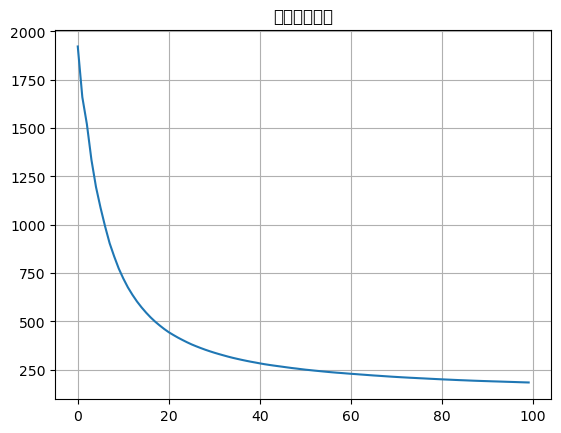

RuntimeError: Numpy is not available

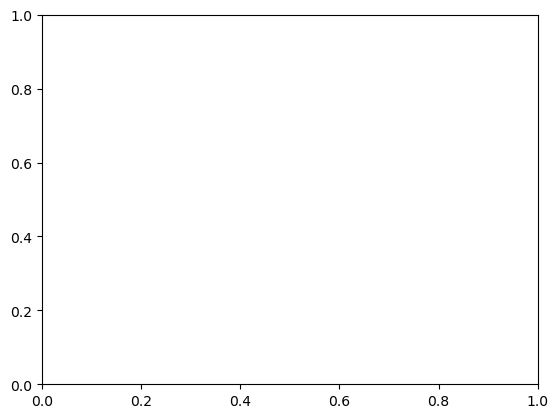

In [123]:
'''
我们使用 PyTorch 的各个组件来构建线性回归模型。在pytorch中进行模型构建的整个流程一般分为四个步骤：
1、准备训练集数据
2、构建要使用的模型
3、设置损失函数和优化器
4、模型训练

要使用的API：
    使用 PyTorch 的 nn.MSELoss() 代替平方损失函数
    使用 PyTorch 的 data.DataLoader 代替数据加载器
    使用 PyTorch 的 optim.SGD 代替优化器
    使用 PyTorch 的 nn.Linear 代替假设函数

'''

import torch
from torch.utils.data import TensorDataset  # 构造数据集对象
from torch.utils.data import DataLoader  # 数据加载器
from torch import nn  # nn模块中有平方损失函数和假设函数
from torch import optim  # optim模块中有优化器函数
from sklearn.datasets import make_regression  # 创建线性回归模型数据集
import matplotlib.pyplot as plt


# 构造数据集
def create_dataset():
    x, y, coef = make_regression(n_samples=100,
                                 n_features=1,
                                 noise=10,
                                 coef=True,
                                 bias=14.5,
                                 random_state=0)

    # 将构建数据转换为张量类型
    x = torch.tensor(x)
    y = torch.tensor(y)

    return x, y, coef

# 训练模型
def construct_liner_regression_model():
    # 构造数据集
    x, y, coef = create_dataset()

    # 构造数据集对象
    dataset = TensorDataset(x, y)

    # 构造数据加载器
    # dataset=:数据集对象
    # batch_size=:批量训练样本数据
    # shuffle=:样本数据是否进行乱序
    dataloader = DataLoader(dataset=dataset, batch_size=16, shuffle=True)

    # 构造模型
    # in_features指的是输入的二维张量的大小，即输入的[batch_size, size]中的size
    # out_features指的是输出的二维张量的大小，即输出的[batch_size，size]中的size
    model = nn.Linear(in_features=1, out_features=1)

    # 构造平方损失函数
    criterion = nn.MSELoss()

    # 构造优化函数
    # params=model.parameters():训练的参数,w和b
    # lr=1e-2:学习率, 1e-2为10的负二次方
    print("w和b-->", list(model.parameters()))
    print("w-->", model.weight)
    print("b-->", model.bias)
    optimizer = optim.SGD(params=model.parameters(), lr=1e-2)

    # 初始化训练次数
    epochs = 100
    # 损失的变化
    epoch_loss = []
    total_loss=0.0
    train_sample=0.0
    for _ in range(epochs):
        for train_x, train_y in dataloader:
            # 将一个batch的训练数据送入模型
            y_pred = model(train_x.type(torch.float32))
            # 计算损失值,均方误差,当前批次所有样本的平均误差 
            loss = criterion(y_pred, train_y.reshape(-1, 1).type(torch.float32))
            total_loss += loss.item()
            # loss是平均误差,所以样本数+1
            train_sample += 1
            # 梯度清零
            optimizer.zero_grad()
            # 自动微分(反向传播)
            loss.backward()
            # 更新参数
            optimizer.step()
        # 计算所有batch的平均误差作为当前epoch的误差 
        epoch_loss.append(total_loss/train_sample)

    # 打印回归模型的w
    print(model.weight)
    # 打印回归模型的b
    print(model.bias)

    # 绘制损失变化曲线 
    plt.plot(range(epochs), epoch_loss)
    plt.title('损失变化曲线')
    plt.grid()
    plt.show()

    # 绘制拟合直线
    plt.scatter(x, y)
    x = torch.linspace(x.min(), x.max(), 1000)
    y1 = torch.tensor([v * model.weight + model.bias for v in x])
    y2 = torch.tensor([v * coef + 14.5 for v in x])
    plt.plot(x, y1, label='训练')
    plt.plot(x, y2, label='真实')
    plt.grid()
    plt.legend()
    plt.show()

construct_liner_regression_model()